In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers, models, regularizers
# from tensorflow.keras.models import Model
# import matplotlib.pyplot as plt
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Load and preprocess the MNIST data from CSV
# mnist_data = pd.read_csv('D:\\7th sem\\Deep Learning\\Dataset\\MNIST\\mnist_784_csv.csv')

# # Separate the features and labels
# X = mnist_data.iloc[:, :-1].values  # All columns except the last one are features
# y = mnist_data.iloc[:, -1].values   # The last column is the label

# # Normalize the pixel values to the range [0, 1]
# X = X.astype('float32') / 255.0

# # Reshape images to 28x28 for the model and add the channel dimension (for grayscale)
# X = X.reshape(-1, 28, 28, 1)

# # Split into train and test sets
# X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 2: Add noise to the images
# noise_factor = 0.5
# X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
# X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# # Clip the values to be between 0 and 1
# X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
# X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

# from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
# # Step 3: Build the Autoencoder Model
# input_img = Input(shape=(28, 28, 1))

# # Encoder
# x = Flatten()(input_img)
# x = Dense(128, activation='relu')(x)
# encoded = Dense(64, activation='relu')(x)

# # Decoder
# x = Dense(128, activation='relu')(encoded)
# x = Dense(28 * 28, activation='sigmoid')(x)
# decoded = Reshape((28, 28, 1))(x)

# # Autoencoder Model
# autoencoder = Model(inputs=input_img, outputs=decoded)
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# # Step 4: Train the Autoencoder
# autoencoder.fit(X_train_noisy, X_train,
#                 epochs=10,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(X_test_noisy, X_test))

# # Step 5: Evaluate the model on test data and visualize the results
# # Predict the denoised images
# denoised_images = autoencoder.predict(X_test_noisy)
# Calculate Mean Squared Error (MSE)
# mse = np.mean(np.square(X_test - denoised_images))
# print(f'Mean Squared Error (MSE): {mse}')
# # Display original, noisy, and denoised images
# n = 10  # Number of images to display
# plt.figure(figsize=(20, 6))
# for i in range(n):
#     # Display original images
#     ax = plt.subplot(3, n, i + 1)
#     plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
#     plt.title("Original")
#     plt.axis("off")
    
#     # Display noisy images
#     ax = plt.subplot(3, n, i + 1 + n)
#     plt.imshow(X_test_noisy[i].reshape(28, 28), cmap="gray")
#     plt.title("Noisy")
#     plt.axis("off")
    
#     # Display denoised images
#     ax = plt.subplot(3, n, i + 1 + 2 * n)
#     plt.imshow(denoised_images[i].reshape(28, 28), cmap="gray")
#     plt.title("Denoised")
#     plt.axis("off")

# plt.show()


In [6]:
# Implement the concept of image denoising using autoencoders on MNIST data set
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd

In [7]:
# Load and preprocess the MNIST data from CSV
mnist_data = pd.read_csv('D:\\7th sem\\Deep Learning\\Dataset\\MNIST\\mnist_784_csv.csv')

In [9]:
# Separate the features and labels
X = mnist_data.iloc[:, :-1].values  # All columns except the last one are features
y = mnist_data.iloc[:, -1].values   # The last column is the label

# Normalize the pixel values to the range [0, 1]
X = X.astype('float32') / 255.0

# Reshape images to 28x28 for the model and add the channel dimension (for grayscale)
X = X.reshape(-1, 28, 28, 1)

# Split into train and test sets
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Add noise to the images
noise_factor = 0.5  #the noise factor to control the amount of noise added
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# Clip the values to be between 0 and 1
X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

In [4]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
# Step 3: Build the Autoencoder Model
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(x)

# Decoder
x = Dense(128, activation='relu')(encoded)
x = Dense(28 * 28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

# Autoencoder Model
autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


# Step 4: Train the Autoencoder
autoencoder.fit(X_train_noisy, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_noisy, X_test))

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.3299 - val_loss: 0.1830
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1743 - val_loss: 0.1558
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1523 - val_loss: 0.1442
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1425 - val_loss: 0.1376
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1358 - val_loss: 0.1332
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1321 - val_loss: 0.1305
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1291 - val_loss: 0.1282
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1267 - val_loss: 0.1261
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1244 - val_loss: 0.1242
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1226 - val_loss: 0.1227


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


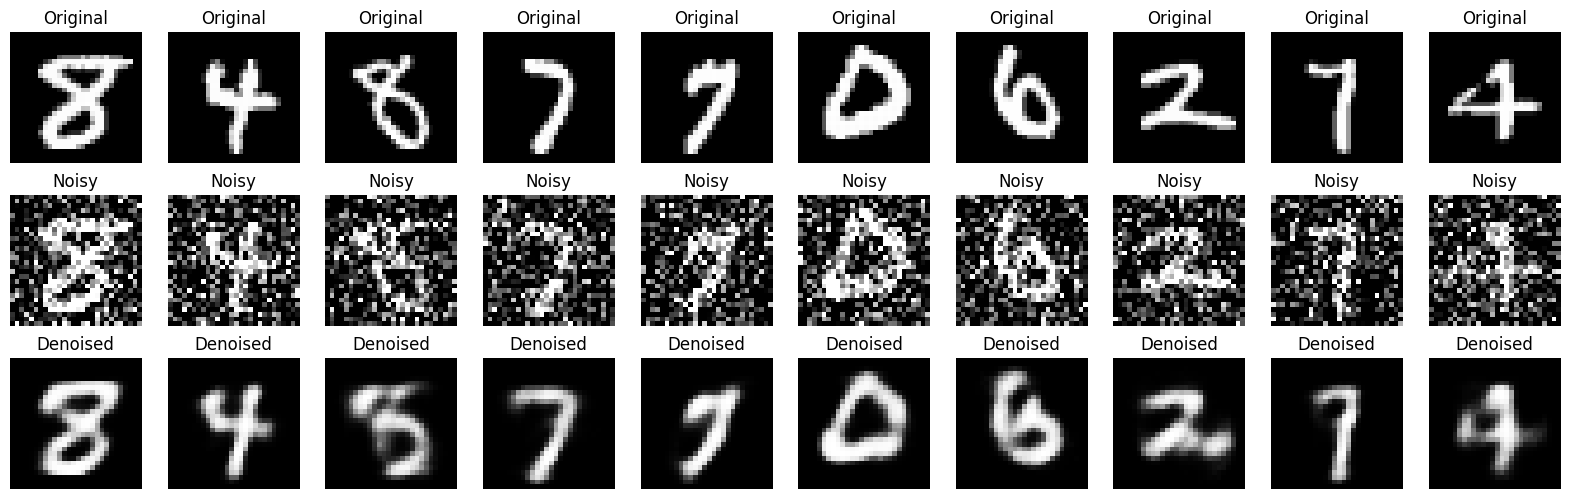

In [5]:
# Step 5: Evaluate the model on test data and visualize the results
# Predict the denoised images
denoised_images = autoencoder.predict(X_test_noisy)

# Calculate Mean Squared Error (MSE)
mse = np.mean(np.square(X_test - denoised_images))
print(f'Mean Squared Error (MSE): {mse}')
# Display original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")
    
    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

plt.show()